<a href="https://colab.research.google.com/github/Roshini1369/data_cleaning/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [18]:
for dirname, _, filenames in os.walk('/content/AB_NYC_2019.csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# AB_NYC_2019.csv has 48895 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/AB_NYC_2019.csv.zip', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '/content/AB_NYC_2019.csv.zip'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


In [22]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


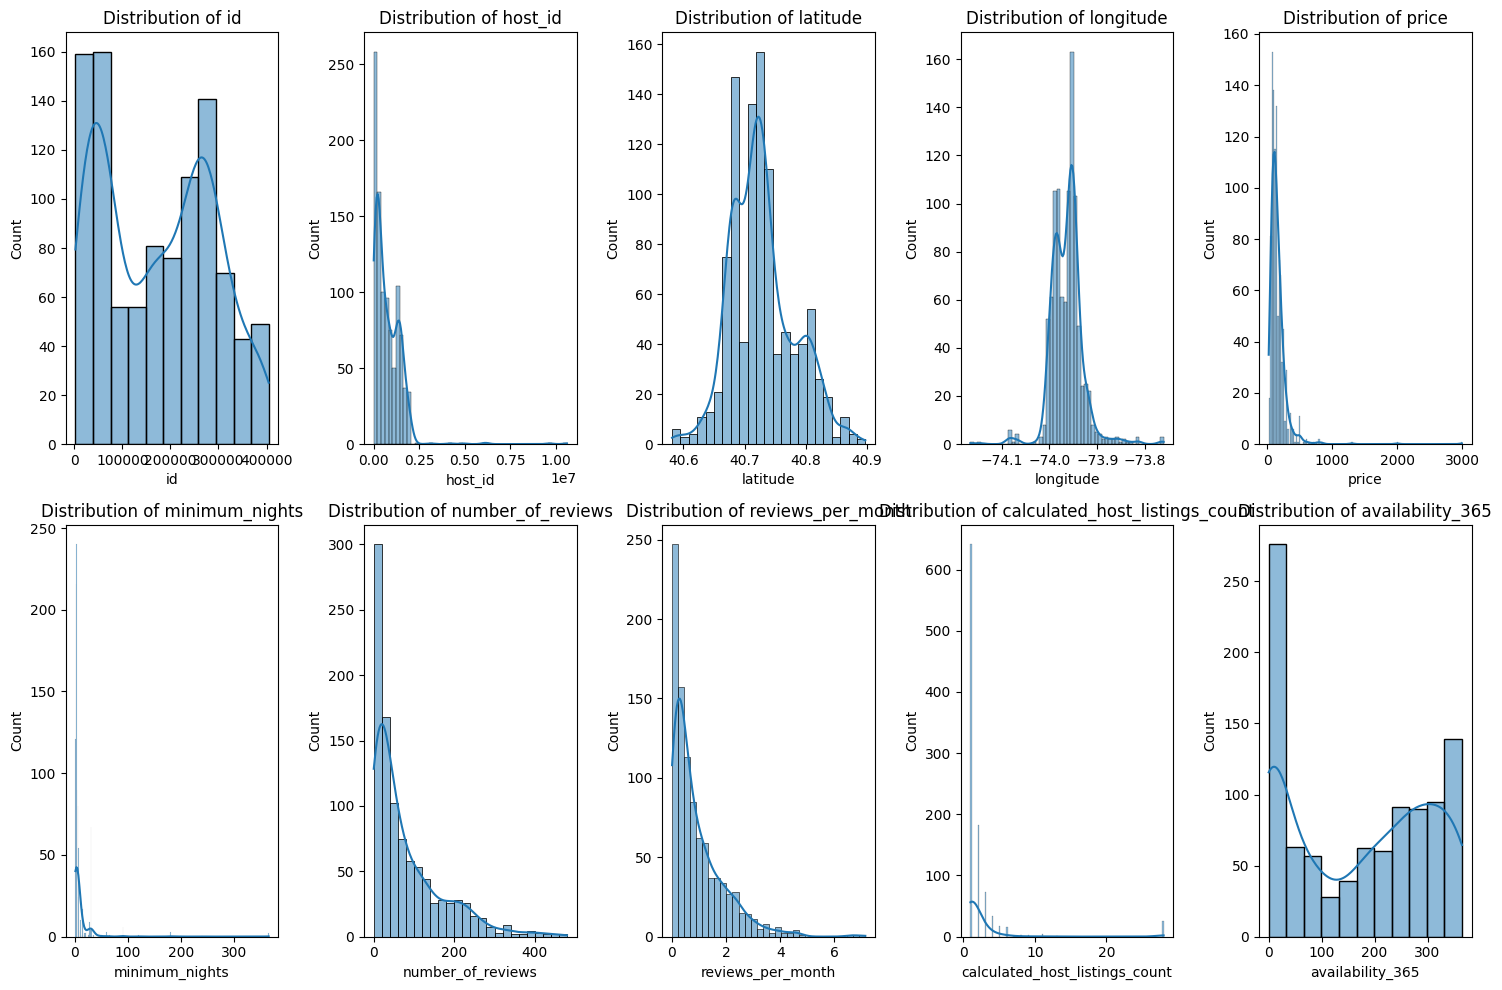

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotPerColumnDistribution(df, rows, cols):
    """
    Plots the distribution of each numerical column in the dataframe.

    Parameters:
    df: DataFrame - The dataset to plot.
    rows: int - Number of rows in the subplot grid.
    cols: int - Number of columns in the subplot grid.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
    num_plots = len(num_cols)

    # Set up the figure and axis
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()  # Flatten to easily iterate through the axes

    # Plot distribution for each numerical column
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

    # Hide any empty subplots
    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df1 is your DataFrame
plotPerColumnDistribution(df1, 2, 5)  # Example with 2 rows and 5 columns


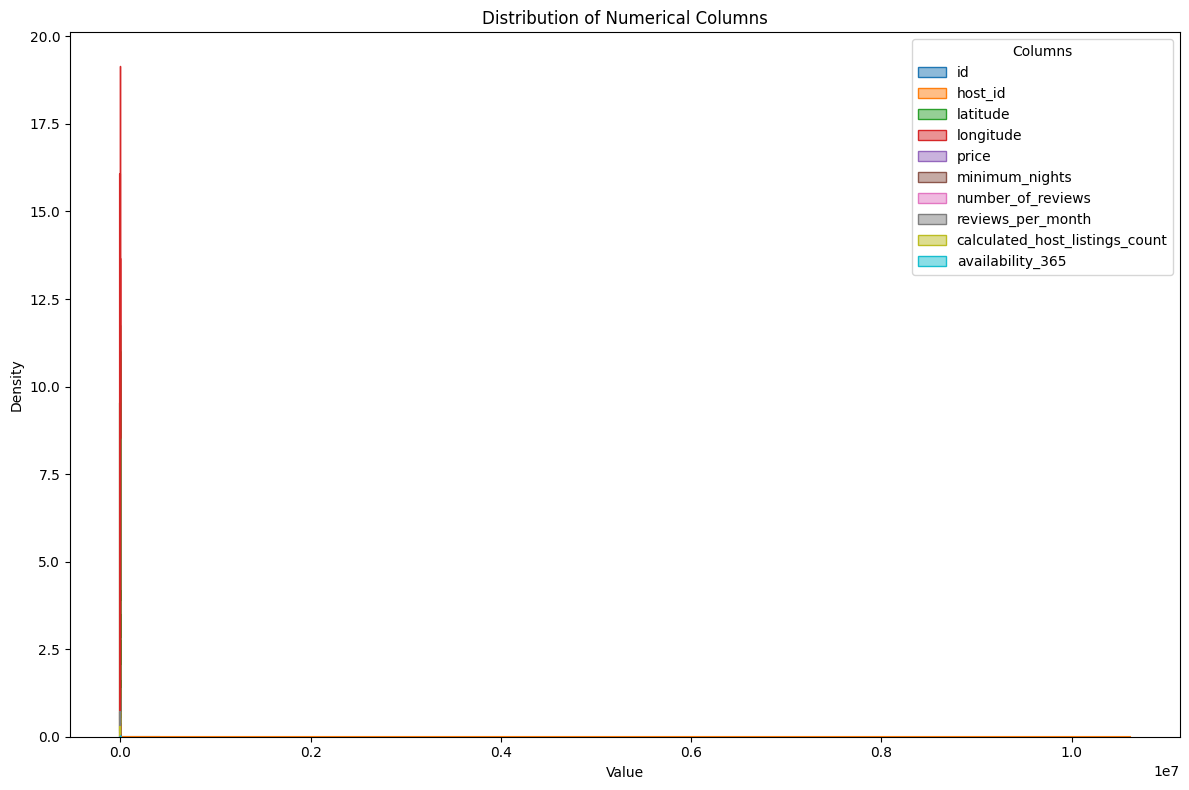

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotAllColumnsDistribution(df):
    """
    Plots the distribution of all numerical columns in the dataframe in a single plot.

    Parameters:
    df: DataFrame - The dataset to plot.
    """
    # Select numerical columns only
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Plot the distribution for each numerical column
    for col in num_cols:
        sns.histplot(df[col], kde=True, label=col, bins=30, element='step', stat='density', common_norm=False)

    # Add labels and title
    plt.title('Distribution of Numerical Columns')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(title='Columns', loc='best')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df1 is your DataFrame
plotAllColumnsDistribution(df1)  # This will plot all numerical columns in one diagram


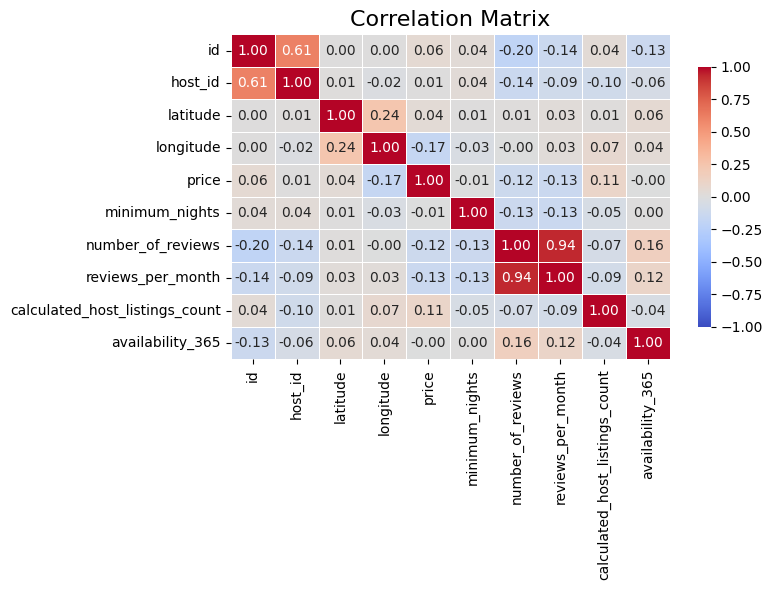

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotCorrelationMatrix(df, figsize=(10, 8)):
    """
    Plots the correlation matrix heatmap for all numerical columns in the dataframe.

    Parameters:
    df: DataFrame - The dataset to plot.
    figsize: tuple - Size of the plot (optional).
    """
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()

    # Set up the plot
    plt.figure(figsize=figsize)

    # Plot the heatmap using seaborn
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

    # Add title and adjust layout
    plt.title('Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df1 is your DataFrame
plotCorrelationMatrix(df1, figsize=(8, 6))  # Adjust figsize as needed


<Figure size 2000x1000 with 0 Axes>

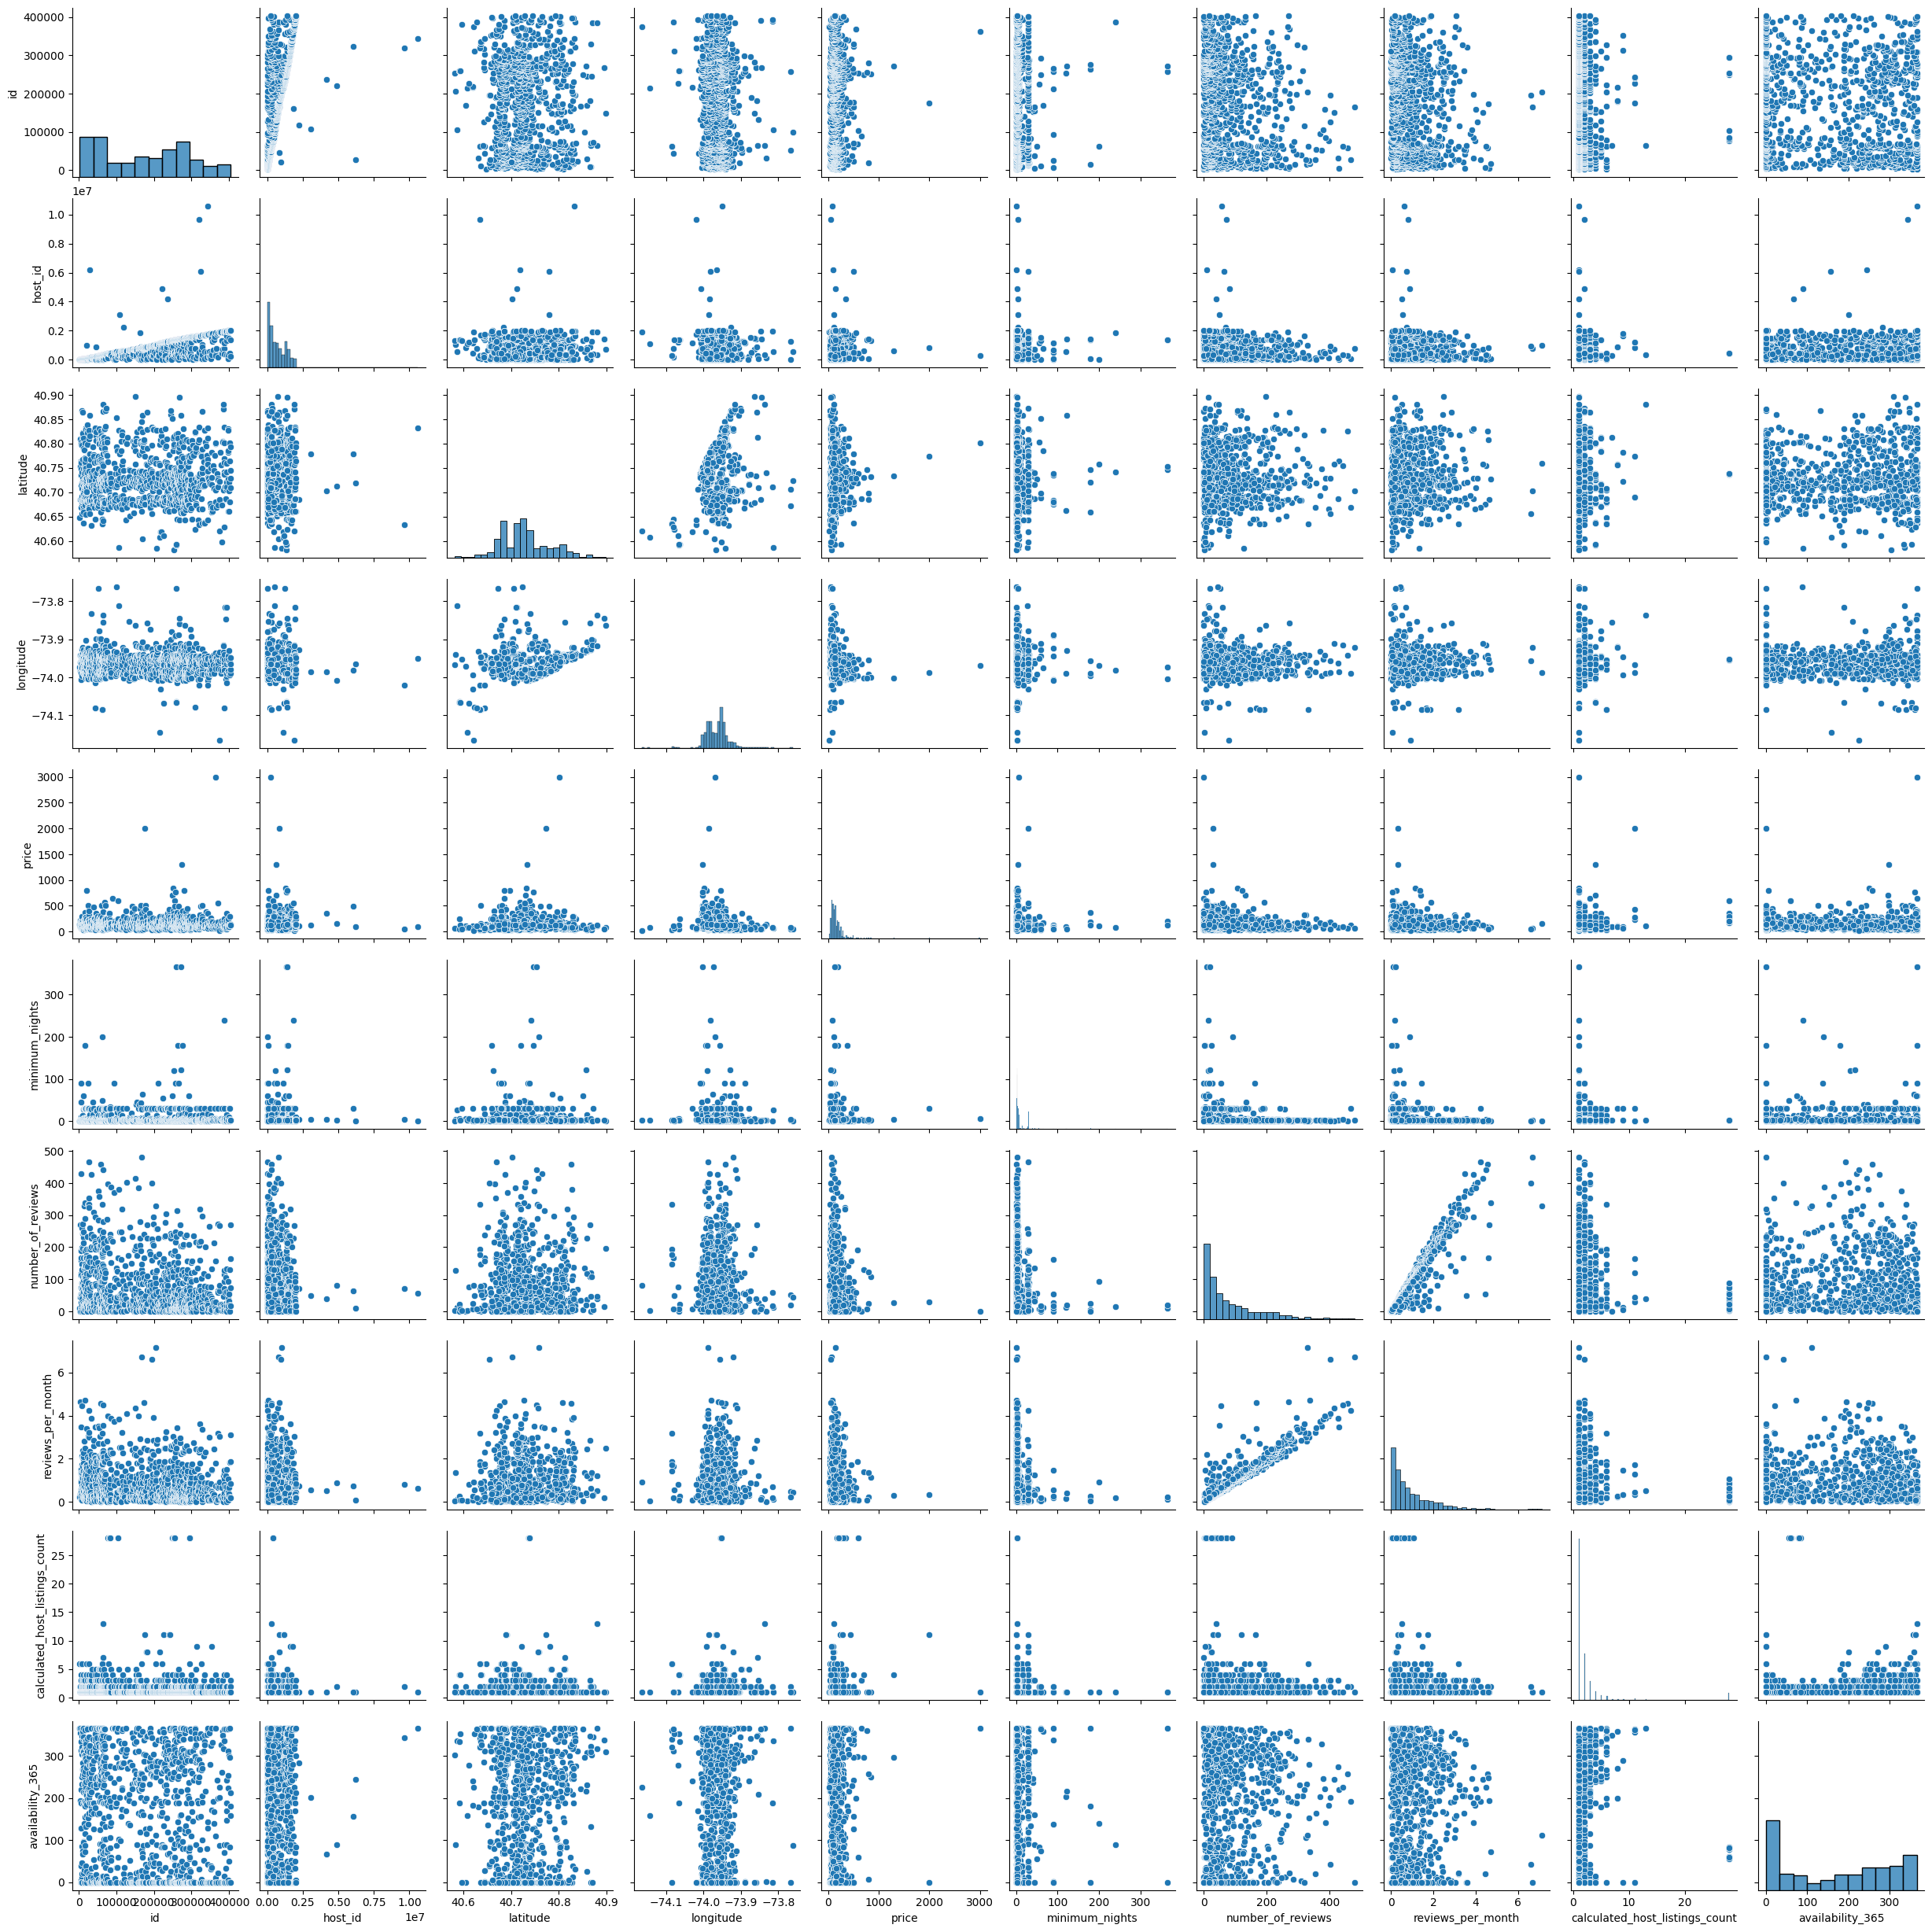

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotScatterMatrix(df, figsize=(20, 10)):
    """
    Plots the scatter matrix (pairplot) for all numerical columns in the dataframe.

    Parameters:
    df: DataFrame - The dataset to plot.
    figsize: tuple - Size of the plot (optional).
    """
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Set up the plot size
    plt.figure(figsize=figsize)

    # Create the pairplot (scatter matrix)
    sns.pairplot(numeric_df)

    # Show the plot
    plt.show()

# Example usage:
# Assuming df1 is your DataFrame
plotScatterMatrix(df1, figsize=(20, 10))  # Adjust figsize as needed
